In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)

In [3]:
df_train = pd.read_csv('./data/train_final.csv')
df_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income>50K
0,53,Self-emp-not-inc,93449,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1
1,33,Self-emp-not-inc,123424,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,47,Private,144844,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,40,Private,114580,HS-grad,9,Divorced,Craft-repair,Other-relative,White,Female,0,0,40,Vietnam,0
4,39,Private,115618,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,0


In [4]:
df_test = pd.read_csv('./data/test_final.csv')
df_test.head()

,ID,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,1,33,Self-emp-not-inc,222162,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
1,2,68,?,29240,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,0,12,United-States
2,3,34,Private,103596,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States
3,4,57,Private,103403,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
4,5,48,Private,152915,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States


In [5]:
# drop the rows with '?' for training
# for testing
rows_with_nan = df_train[df_train.isin(['?']).any(axis=1)]
rows_with_nan.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income>50K
26,19,?,141418,Some-college,10,Never-married,?,Own-child,White,Male,0,0,15,United-States,0
30,21,?,163665,Some-college,10,Never-married,?,Own-child,White,Female,0,0,40,United-States,0
36,50,Private,102346,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,36,?,0
50,51,?,165637,Masters,14,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,0
66,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,0


In [6]:
nan_cols = []
for attr in df_train.columns:
    if df_train[attr].eq('?').any():
        nan_cols.append(attr)
        print(attr)

workclass
occupation
native.country


In [7]:
def plot_contribution(df: pd.DataFrame, attr: str, label:str = 'income>50K'):
    info = df.groupby([label, attr], sort=True).size().unstack(fill_value=0).stack()
    attr_vals = [col for _, col in info.keys()]
    attr_vals = attr_vals[:len(attr_vals)//2]
    y1 = info.values[:len(attr_vals)]
    y2 = info.values[len(attr_vals):]
    total = y1+y2
    y1 = 100*y1/total
    y2 = 100*y2/total
    df1 = pd.DataFrame.from_dict({
        'y1': y1,
        'y2': y2,
        'attr_vals': attr_vals
    })
    df1.sort_values(by='y1', inplace=True)
    p1 = plt.barh(df1['attr_vals'], df1['y1'], label='below 50k')
    p2 = plt.barh(df1['attr_vals'], df1['y2'], left=df1['y1'], label='above 50k')
    plt.bar_label(p1, label_type='center')
    plt.bar_label(p2, label_type='center')
    plt.legend()
    plt.title(attr)
    plt.savefig(attr+'.png')
    plt.show()
    # return y1, y2

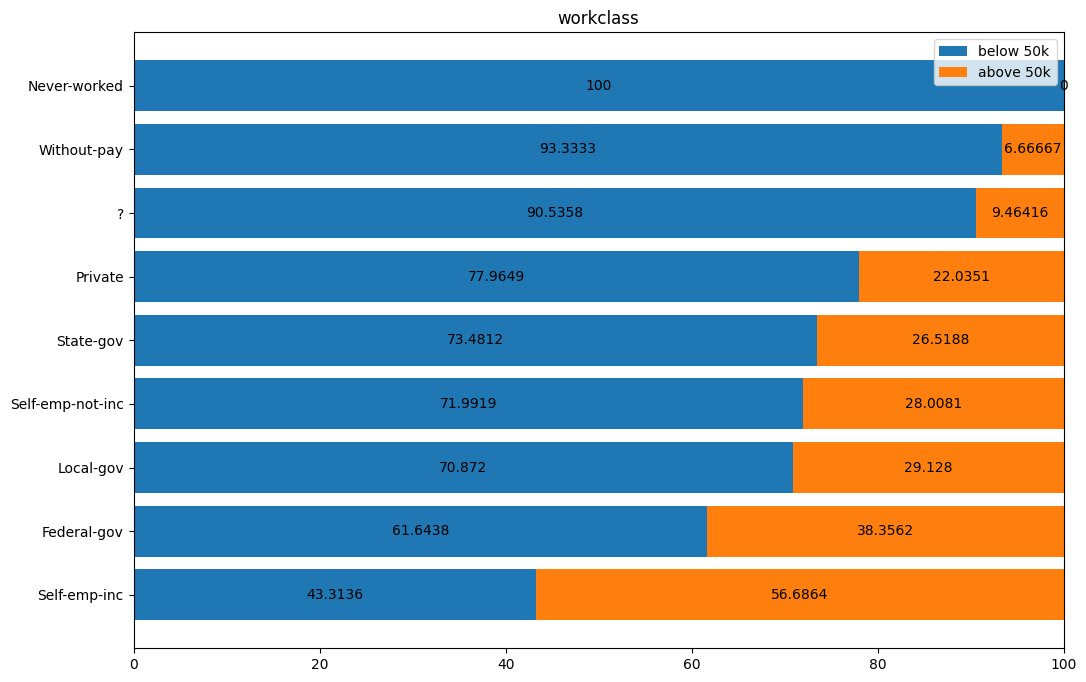

In [8]:
plot_contribution(df_train, 'workclass')

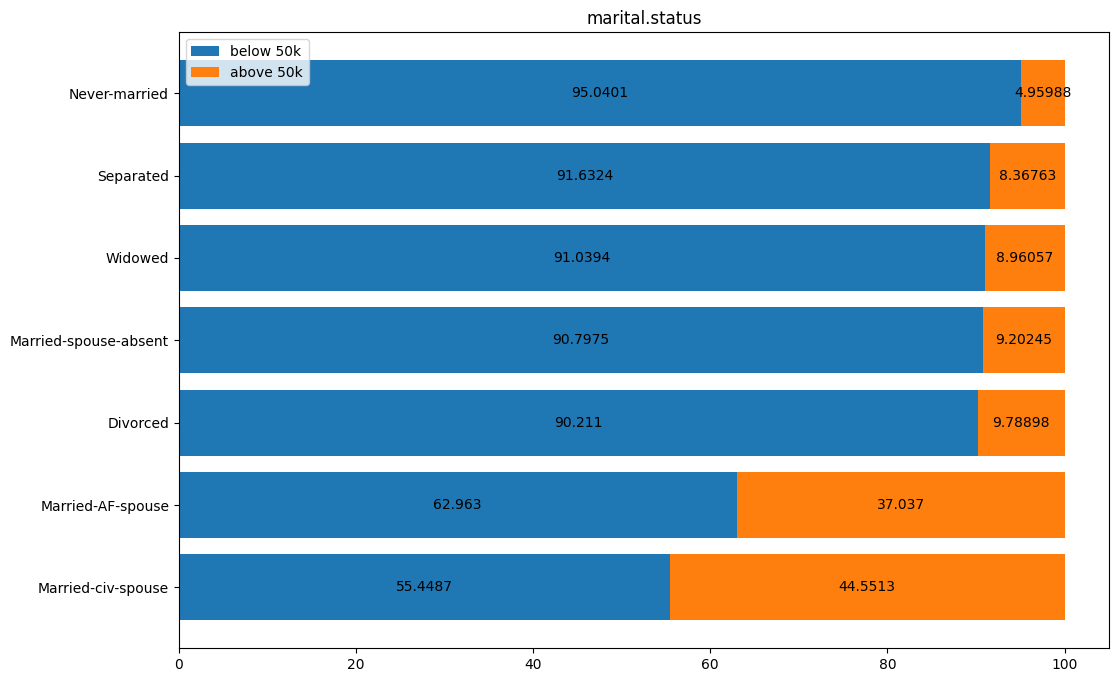

In [9]:
plot_contribution(df_train, 'marital.status')

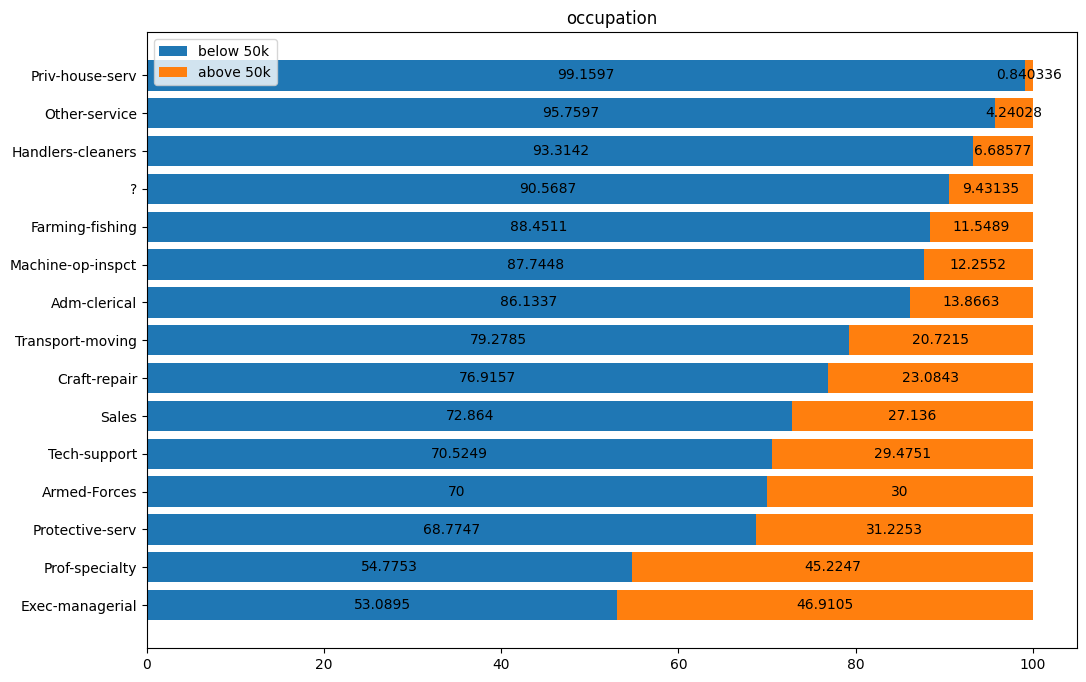

In [10]:
plot_contribution(df_train, 'occupation')

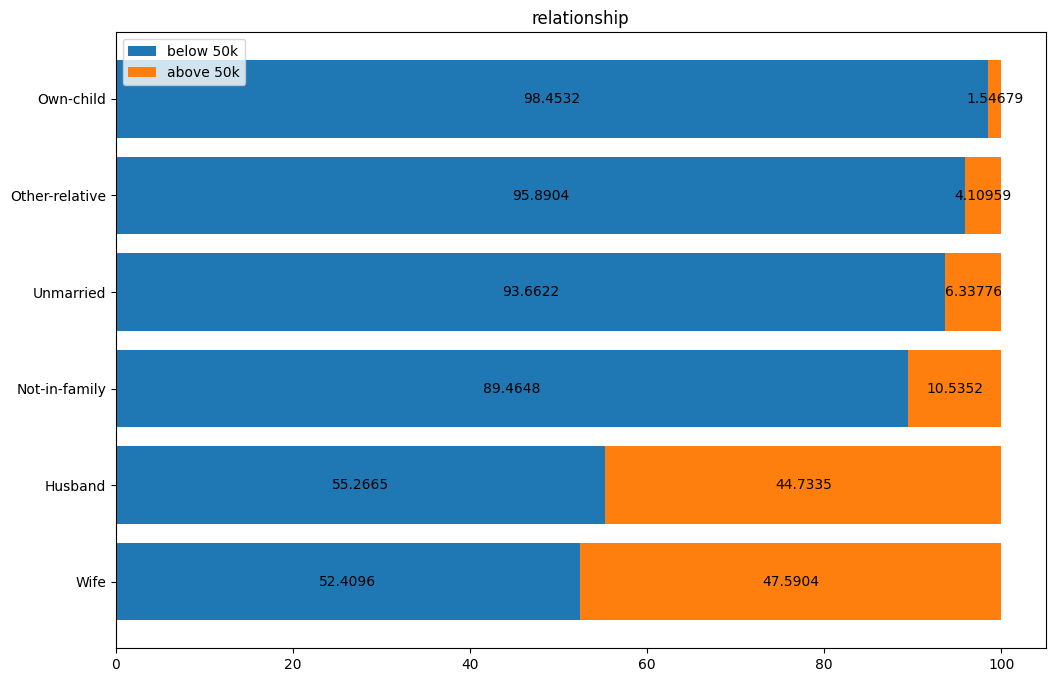

In [11]:
plot_contribution(df_train, 'relationship')

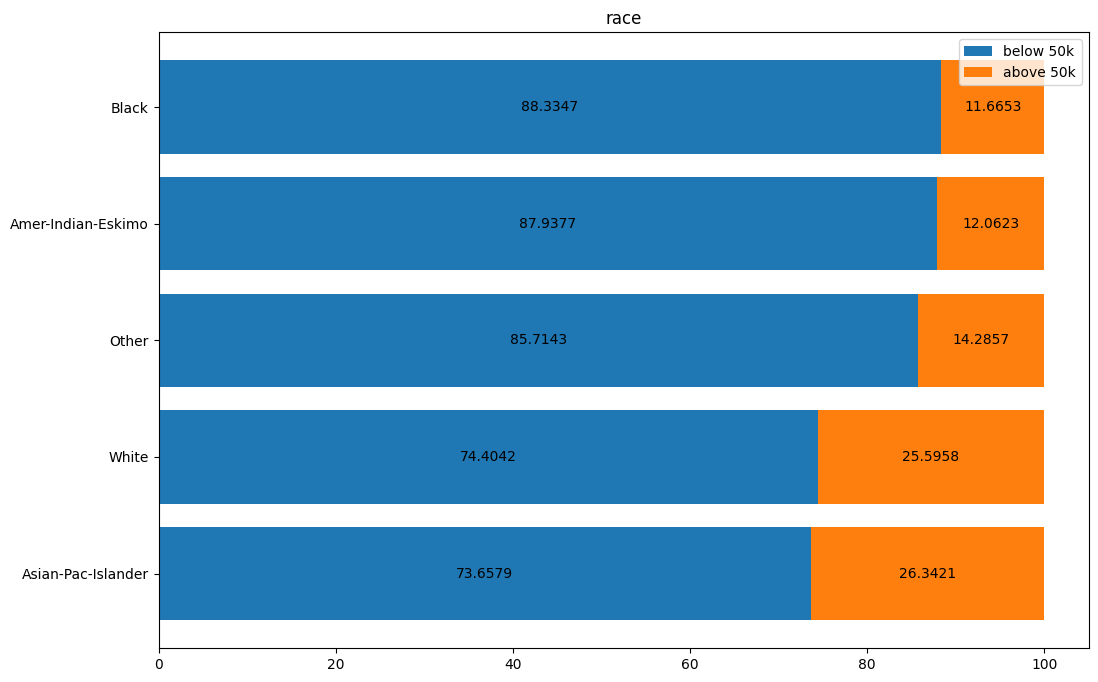

In [12]:
plot_contribution(df_train, 'race')

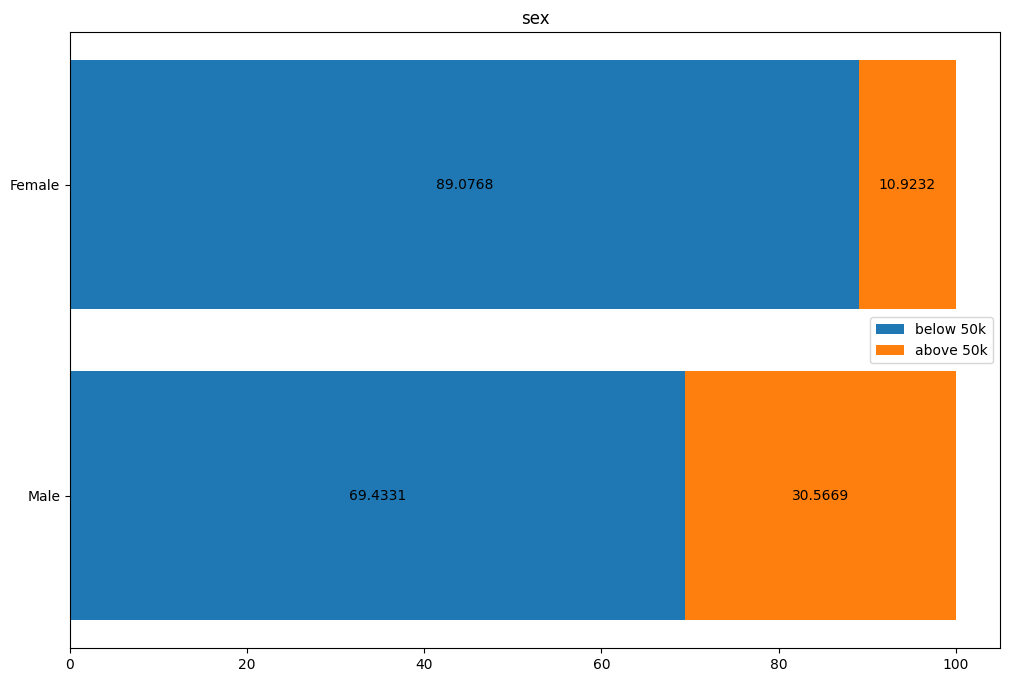

In [13]:
plot_contribution(df_train, 'sex')

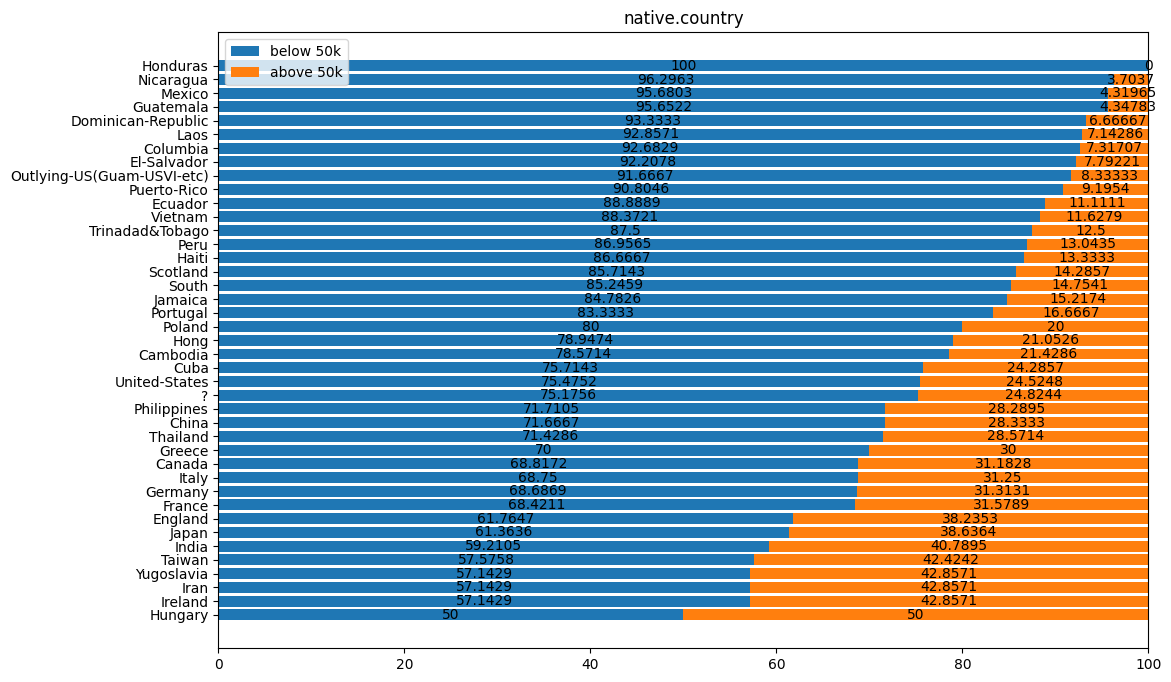

In [14]:
plot_contribution(df_train, 'native.country')